# Theano Logistic Regression

In [ ]:
!pip install theano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=a9f6c2932f00027f36f89642b806d886a9b466faab6b7024e282c16c7a0102aa
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built theano


In [ ]:
!pip install tensor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 897.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71552 sha256=ceebb38ed0d24bf369f0b377b50624594abe88d2d857891401905fd191372af3
  Stored in directory: /root/.cache/pip/wheels/b8/d7/e8/f4760f8bcef039fce5899d36f67

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

In [ ]:
x = T.matrix('x')
s = 1 / (1 + T.exp(-x))
sigmoid = theano.function([x], s, allow_input_downcast=True)

In [ ]:
sigmoid([[ 0, 1],
         [-1,-2]])

array([[ 0.5       ,  0.7310586 ],
       [ 0.26894143,  0.11920293]], dtype=float32)

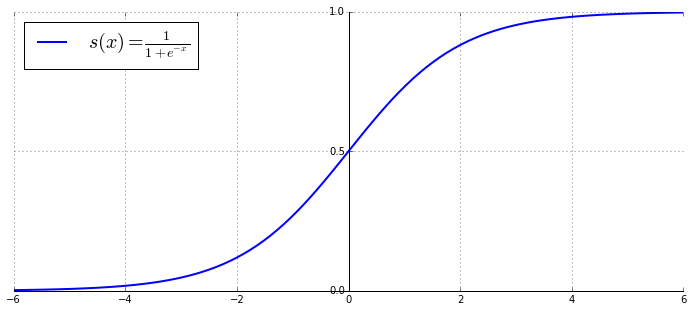

In [ ]:
X = np.linspace(-6, 6, 100)
X = X[np.newaxis,:]

plt.figure(figsize=(12,5))

plt.plot(X.flatten(), sigmoid(X).flatten(), linewidth=2)

plt.grid('on')
plt.yticks([0,0.5,1])

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.legend([r'$s(x)=\frac{1}{1+e^{-x}}$'], loc=0, fontsize=20)

plt.show()

In [ ]:
s2 = (1 + T.tanh(x / 2)) / 2

sigmoid2 = theano.function([x], s2)

sigmoid2([[ 0, 1],
          [-1,-2]])

array([[ 0.5       ,  0.7310586 ],
       [ 0.26894143,  0.11920291]], dtype=float32)

## logistic Regression

In [ ]:
rng = np.random

N = 400
feats = 784

# D = (X, Y)
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))

In [ ]:
x = T.matrix('x')
y = T.vector('y')

w = theano.shared(rng.randn(feats), name='w')
b = theano.shared(0., name='b')

In [ ]:
h = 1 / (1 + T.exp(-T.dot(x, w) - b))

In [ ]:
prediction = h > 0.5

In [ ]:
cost = - T.mean(y * T.log(h) + (1 - y) * T.log(1 - h)) + 0.01 * T.sum(w ** 2)
gw, gb = T.grad(cost, [w, b])

In [ ]:
train = theano.function(inputs=[x, y],
                        outputs=cost,
                        updates=[[w, w - 0.1 * gw], [b, b - 0.1 * gb]],
                        allow_input_downcast=True)

predict = theano.function(inputs=[x],
                          outputs=prediction,
                          allow_input_downcast=True)

In [ ]:
for i in xrange(10001):
    err = train(D[0], D[1])
    if i % 1000 == 0:
        print 'iter %5d, error %f' % (i, err)

iter     0, error 19.295896
iter  1000, error 0.210341
iter  2000, error 0.126124
iter  3000, error 0.124872
iter  4000, error 0.124846
iter  5000, error 0.124845
iter  6000, error 0.124845
iter  7000, error 0.124845
iter  8000, error 0.124845
iter  9000, error 0.124845
iter 10000, error 0.124845


In [ ]:
print D[1]

[0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0]


In [ ]:
print predict(D[0])

[0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0]
